load_digits 데이터셋은 손글씨 숫자 이미지를 포함한 8x8 픽셀 데이터를 제공하는 간단한 데이터셋: 교재 300

### NumPy 실습 과제
##### a) 데이터 이해 및 기본 처리
digits.data를 NumPy 배열로 확인하고 배열의 shape, 데이터 타입 등을 출력해 보세요.
각 샘플 이미지 데이터를 8x8 배열로 변환하여 특정 샘플 이미지를 시각화해 보세요.
각 이미지의 픽셀 값 평균을 구하세요.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
help(load_digits)

Help on function load_digits in module sklearn.datasets._base:

load_digits(*, n_class=10, return_X_y=False, as_frame=False)
    Load and return the digits dataset (classification).

    Each datapoint is a 8x8 image of a digit.

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============

    This is a copy of the test set of the UCI ML hand-written digits datasets
    https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

    Read more in the :ref:`User Guide <digits_dataset>`.

    Parameters
    ----------
    n_class : int, default=10
        The number of classes to return. Between 0 and 10.

    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about 

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
print(digits.images.shape)
print(digits.target.size)

(1797, 8, 8)
1797


In [8]:
# digits.data를 NumPy 배열로 확인 
data = digits.data
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
# 배열의 shape, 데이터 타입 등을 출력
print("shpae :",data.shape)
print("type :",data.dtype)

shpae : (1797, 64)
type : float64


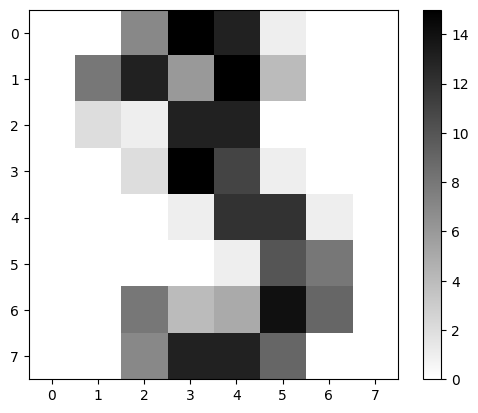

In [10]:
#각 샘플 이미지 데이터를 8x8 배열로 변환하여 특정 샘플 이미지를 시각화해 보세요.
sample_num = 3
plt.imshow(digits.images[sample_num], cmap='binary')
# plt.imshow(digits.data[sample_num].reshape(8,8), cmap='gray')
plt.colorbar()

In [11]:
# 각 이미지의 픽셀 값 평균을 구하세요.
pixel_means = digits.data.mean(axis=1)
print(pixel_means.size)
print(pixel_means)

1797
[4.59375  4.890625 5.375    ... 5.84375  5.375    6.125   ]



##### b) 숫자 필터링
타겟 값(target)이 특정 숫자(예: 3)인 샘플만 필터링하여 별도의 배열로 저장하세요.
필터링된 샘플의 평균 픽셀 값을 계산하세요.





In [12]:
(digits.target == 3).sum()

np.int64(183)

In [13]:
data2 = digits.data[digits.target == 3]
data2.shape

(183, 64)

In [14]:
data2_mean = data2.mean(axis=1)
data2_mean.shape

(183,)

In [15]:
data2_mean[:5]

array([4.171875, 5.015625, 4.46875 , 4.390625, 4.28125 ])

#### c) 데이터 변환
모든 픽셀 값을 0~1 사이로 정규화하세요.

In [16]:
data_noraml = data / data.max()
data_noraml

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

(array([60367.,  6240.,  3261.,  5362.,  2627.,  6049.,  5556.,  3668.,
         7118., 14760.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

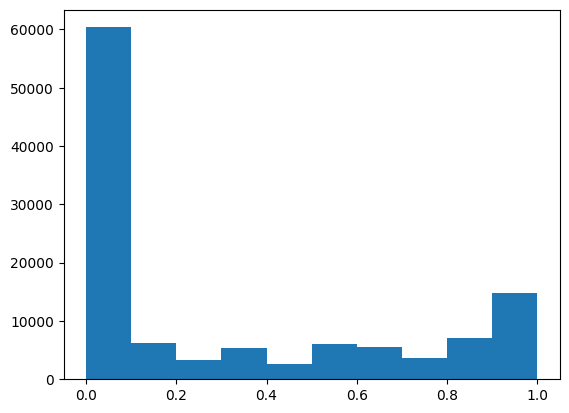

In [17]:
plt.hist(data_noraml.flatten())     #2차원을 1차원으로 나누어서 확인

## Pandas 실습 과제
#### a) 데이터프레임 생성 및 탐색
digits.data와 digits.target을 결합하여 Pandas DataFrame을 생성하세요.

각 숫자(0~9)가 몇 개씩 포함되어 있는지 확인하세요.

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
raw_data = np.hstack([digits.target.reshape(-1,1), digits.data])
raw_data.shape

(1797, 65)

In [20]:
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits.head()
df_digits['target'] = digits.target
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [21]:
cols = np.hstack(['target', digits.feature_names])


In [22]:
df_digits = pd.DataFrame(raw_data, columns=cols)
df_digits

,target,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,9.0,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,8.0,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,9.0,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [23]:
df_digits.shape

(1797, 65)

In [24]:
df_digits['target'].value_counts().sort_index()

target
0.0    178
1.0    182
2.0    177
3.0    183
4.0    181
5.0    182
6.0    181
7.0    179
8.0    174
9.0    180
Name: count, dtype: int64

<Axes: xlabel='target'>

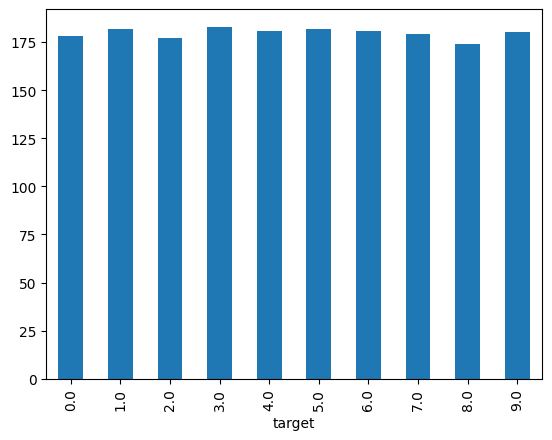

In [25]:
df_digits['target'].value_counts().sort_index().plot.bar()

In [26]:
counts = [(digits.target == t).sum() for t in digits.target_names]
counts

[np.int64(178),
 np.int64(182),
 np.int64(177),
 np.int64(183),
 np.int64(181),
 np.int64(182),
 np.int64(181),
 np.int64(179),
 np.int64(174),
 np.int64(180)]


#### b) 숫자별 통계
각 숫자(0~9)에 대해 평균 픽셀 값을 계산하여 새로운 DataFrame으로 나타내세요.
숫자별로 가장 밝은(최대 픽셀 값이 높은) 이미지를 찾으세요.



In [27]:
data2 = digits.data[digits.target == 3]

In [28]:
col=['mean']
means = [digits.data[digits.target == t].mean() for t in digits.target_names]
df2 = pd.DataFrame(means, columns=col)
df2

,mean
0,4.952159
1,4.894145
2,4.905191
3,4.794314
4,4.854886
5,4.800395
6,4.863260
7,4.738914
8,5.155172
9,4.895139


In [29]:
tmp = digits.data[digits.target == 0]

In [30]:
tmp.max(axis=1).shape

(178,)

In [31]:
b_images = []
for t in digits.target_names:
    # 숫자별 데이타
    number_data = digits.data[digits.target == t]
    
    # 각 데이터별 평균값들
    means = number_data.max(axis=1)

    # 그 중에서 젤 높은 값의 인덱스
    idx_of_max1 = np.argmax(means)

    b_image = number_data[idx_of_max1]
    b_images.append(b_image)

brightest_images = np.array(b_images)
brightest_images.shape

(10, 64)

#### c) 데이터 시각화
각 숫자(0~9)에 대해 샘플 이미지를 시각화하는 함수 plot_sample_images를 작성하세요.
숫자별 픽셀 값 분포를 박스 플롯(Box plot)으로 그리세요.

In [32]:
digits.images[digits.target==0].shape

(178, 8, 8)

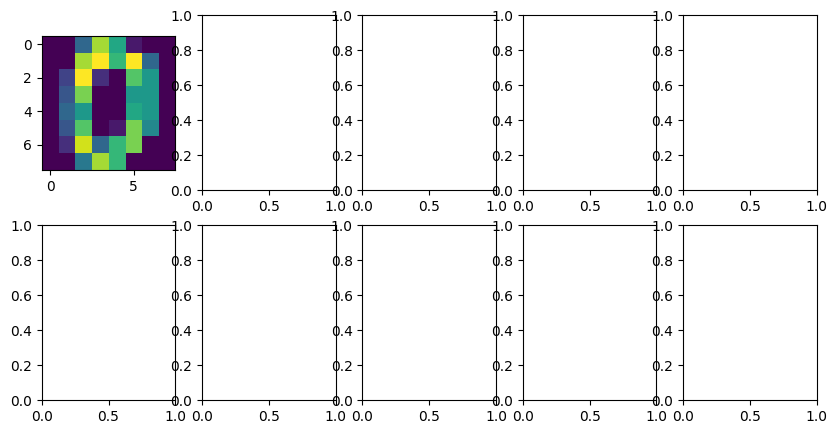

In [36]:
fig, axes = plt.subplots(2, 5, figsize=(10,5))
axes[0,0].imshow(digits.images[0])


### 종합 과제
a) 이미지 분류 모델
DataFrame에서 target 열을 제외한 데이터를 NumPy 배열로 변환하세요.
분류를 위해 데이터를 훈련 세트와 테스트 세트로 나누세요.
간단한 k-NN 또는 SVM 모델을 사용하여 숫자를 분류하는 코드를 작성하세요.

b) EDA(탐색적 데이터 분석)
각 숫자의 평균 이미지를 생성하여 시각화하세요.
숫자별로 데이터의 분포를 비교하는 히스토그램을 작성하세요.

5장 과제
PCA를 사용한 차원 축소: digits.data의 차원을 줄여 2D 또는 3D로 시각화하세요.

군집화: K-Means 알고리즘을 사용하여 데이터 포인트를 10개의 클러스터로 나누고 결과를 시각화하세요.